# Data mining project - ysolanky

## Implementation of naive bayes and SVM

In [10]:
import pandas as pd
import re
from nltk.corpus import stopwords
import numpy as np

In [129]:
df = pd.read_csv("dataset.csv")

C:\Users\yashp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4,5,6,11,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [130]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,05/10/2019,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,NaN,NaN,NAVY FEDERAL CREDIT UNION,FL,328XX,Older American,NaN,Web,05/10/2019,In progress,Yes,NaN,3238275
1,05/10/2019,Checking or savings account,Other banking product or service,Managing an account,Deposits and withdrawals,NaN,NaN,BOEING EMPLOYEES CREDIT UNION,WA,98204,NaN,NaN,Referral,05/10/2019,Closed with explanation,Yes,NaN,3238228
2,05/10/2019,Debt collection,Payday loan debt,Communication tactics,Frequent or repeated calls,NaN,NaN,CURO Intermediate Holdings,TX,751XX,NaN,NaN,Web,05/10/2019,Closed with explanation,Yes,NaN,3237964
3,05/10/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Old information reappears or never goes away,NaN,NaN,Ad Astra Recovery Services Inc,LA,708XX,NaN,NaN,Web,05/10/2019,Closed with explanation,Yes,NaN,3238479
4,05/10/2019,Checking or savings account,Checking account,Managing an account,Banking errors,NaN,NaN,ALLY FINANCIAL INC.,AZ,85205,NaN,NaN,Postal mail,05/10/2019,In progress,Yes,NaN,3238460


In [131]:
df = df[df["Consumer complaint narrative"].notnull()]
#Removing the null rows

In [132]:
df = df[["Issue","Consumer complaint narrative"]]

In [1]:
# Removing everthing besides the X and Y from the dataset

In [133]:
df

,Issue,Consumer complaint narrative
29904,Incorrect information on your report,The Summer of XX/XX/2018 I was denied a mortga...
30629,Incorrect information on your report,There are many mistakes appear in my report wi...
30735,Incorrect information on your report,There are many mistakes appear in my report wi...
30795,Incorrect information on your report,There are many mistakes appear in my report wi...
30807,Incorrect information on your report,There are many mistakes appear in my report wi...
...,...,...
912543,Other,Mel S. Harris & assoc. used deceptive collecti...
912546,Disclosure verification of debt,Portfolio Recovery has been reporting a collec...
912550,Charged fees or interest I didn't expect,I KEEP RECEIVING PHONE CALLS FRON NORTHEAST RE...
912552,Incorrect information on credit report,account reported as discharged through bankrup...


In [134]:
df = df.reset_index(drop=True)

In [2]:
# These fucntions perform pre processing on the Consumer complaint narrative column
def remove_non_string(x):
    t1=re.sub('[^A-Za-z\s]+', '',x)
    t2=re.sub('x{2,20}', '',t1)
    return (t2)

def rem_stop(x):
    to_remove = stopwords.words("english")
    y = ' '.join([sw for sw in x.split() if sw not in to_remove])
    return(y)

# def pre_process(dataframe):
#     for_analysis_t1=dataframe.copy()
#     for_analysis_t2=for_analysis_t1.loc[for_analysis_t1['commentBody'].notnull()].copy()
#     for_analysis_t2['commentBody']=for_analysis_t2['commentBody'].str.lower()
#     for_analysis_t2['commentBody_']=for_analysis_t2['commentBody'].apply(remove_non_string)
#     for_analysis_t2['commentBody_']=for_analysis_t2['commentBody_'].apply(rem_stop)
#     dataframe["commentBody_"] = for_analysis_t2['commentBody_']
#     dataframe.drop(["commentBody"],axis = 1,inplace = True)
#     dataframe.rename(columns = {"commentBody_":"commentBody"},inplace = True)
    
def pre_process(dataframe):
    #dataframe = dataframe.loc[dataframe['commentBody'].notnull()]
    dataframe['Consumer complaint narrative']= dataframe['Consumer complaint narrative'].str.lower()
    dataframe['Consumer complaint narrative']= dataframe['Consumer complaint narrative'].apply(remove_non_string)
    dataframe['Consumer complaint narrative']= dataframe['Consumer complaint narrative'].apply(rem_stop)

In [136]:
df.tail()

,Issue,Consumer complaint narrative
383559,Other,Mel S. Harris & assoc. used deceptive collecti...
383560,Disclosure verification of debt,Portfolio Recovery has been reporting a collec...
383561,Charged fees or interest I didn't expect,I KEEP RECEIVING PHONE CALLS FRON NORTHEAST RE...
383562,Incorrect information on credit report,account reported as discharged through bankrup...
383563,"Loan servicing, payments, escrow account",I currently have a mortgage with Flag star ban...


In [137]:
df["Issue"].value_counts()

Incorrect information on your report                                                48773
Problem with a credit reporting company's investigation into an existing problem    24727
Incorrect information on credit report                                              21217
Attempts to collect debt not owed                                                   19845
Cont'd attempts collect debt not owed                                               17435
                                                                                    ...  
Property was sold                                                                       3
Property was damaged or destroyed property                                              2
Lender damaged or destroyed vehicle                                                     2
Problem with an overdraft                                                               1
Lender damaged or destroyed property                                                    1
Name: Issu

In [138]:
df.describe

<bound method NDFrame.describe of                                            Issue  \
0           Incorrect information on your report   
1           Incorrect information on your report   
2           Incorrect information on your report   
3           Incorrect information on your report   
4           Incorrect information on your report   
...                                          ...   
383559                                     Other   
383560           Disclosure verification of debt   
383561  Charged fees or interest I didn't expect   
383562    Incorrect information on credit report   
383563  Loan servicing, payments, escrow account   

                             Consumer complaint narrative  
0       The Summer of XX/XX/2018 I was denied a mortga...  
1       There are many mistakes appear in my report wi...  
2       There are many mistakes appear in my report wi...  
3       There are many mistakes appear in my report wi...  
4       There are many mistakes appear in

In [139]:
a = df.groupby(["Issue"])

In [140]:
len(a)

161

In [3]:
# We observe that there are a total of 161 Issues.

In [141]:
a.describe()

Consumer complaint narrative  \
                                                                          count   
Issue                                                                             
APR or interest rate                                                        785   
Account opening, closing, or management                                    6347   
Account terms and changes                                                    17   
Adding money                                                                 92   
Advertising                                                                  47   
...                                                                         ...   
Vehicle was repossessed or sold the vehicle                                  72   
Was approved for a loan, but didn't receive money                             8   
Was approved for a loan, but didn't receive the...                           48   
Written notification about debt                                            8976   
Wrong amount charged or received                                            210   

                                                           \
                                                   unique   
Issue                                                       
APR or interest rate                                  785   
Account opening, closing, or management              6331   
Account terms and changes                              17   
Adding money                                           92   
Advertising                                            47   
...                                                   ...   
Vehicle was repossessed or sold the vehicle            72   
Was approved for a loan, but didn't receive money       8   
Was approved for a loan, but didn't receive the...     48   
Written notification about debt                      8546   
Wrong amount charged or received                      210   

                                                                                                       \
                                                                                                  top   
Issue                                                                                                   
APR or interest rate                                In XXXX/XXXX/XXXX I transfer {$2600.00} for 0 ...   
Account opening, closing, or management             On at least XXXX previous occasions, I request...   
Account terms and changes                           CNAC car creditor keeps updating status on my ...   
Adding money                                        I purchase per paid card added money, then the...   
Advertising                                         Just got an unsolicited debit card by mail, a ...   
...                                                                                               ...   
Vehicle was repossessed or sold the vehicle         In XXXX I filed for a Vehicle Title Loan as an...   
Was approved for a loan, but didn't receive money   I applied for an installment/registration loan...   
Was approved for a loan, but didn't receive the...  Was doing a yearly credit check on XX/XX/XXXX,...   
Written notification about debt                     Capital One has violated 15 USC 1692 by contin...   
Wrong amount charged or received                    on XXXX XXXX ( Friday ) at approx XXXX pacific...   

                                                         
                                                   freq  
Issue                                                    
APR or interest rate                                  1  
Account opening, closing, or management               4  
Account terms and changes                             1  
Adding money                                          1  
Advertising                                           1  
...                                                 ...  
Vehicle was repossessed or sold the vehi

In [142]:
df = a.filter(lambda x: len(x) > 10000)

In [4]:
# As 161 is a lot of issues with most of them barely having any data, we opted to remove Issues with less tahn 10,000 occurences

In [143]:
df["Issue"].unique()

array(['Incorrect information on your report',
       "Problem with a credit reporting company's investigation into an existing problem",
       'Attempts to collect debt not owed', 'Improper use of your report',
       'Communication tactics', 'Incorrect information on credit report',
       'Loan servicing, payments, escrow account',
       'Loan modification,collection,foreclosure',
       "Cont'd attempts collect debt not owed"], dtype=object)

In [5]:
# These are the final 9 columns

In [144]:
pre_process(df)

In [186]:
df1 =df.sample(25000)
#df1 = df

In [6]:
# We have to make a sample of 25,000 rows as Naive bayes function requires a lot of memory and we could not run it on our 
# Machines due to memory restraint

In [187]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [188]:
vectorizer = CountVectorizer(strip_accents="ascii", lowercase=True, stop_words="english")
X_train = vectorizer.fit_transform(df1["Consumer complaint narrative"]).toarray()

In [7]:
# Using count vectorizer we get a count of all the separate words

In [189]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

temp = np.array(df1["Issue"])
Y_train = encoder.fit_transform(temp.reshape(-1,1))

C:\Users\yashp\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [8]:
# Using label encoder we encode the ISSUES

## First approach - MultinomialNB

In [190]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()

In [191]:
naive_bayes.fit(X_train,Y_train)

MultinomialNB()

In [192]:
df2 = df.sample(10000)
X_test = vectorizer.transform(df2["Consumer complaint narrative"]).toarray()

In [9]:
# df2 will be used for sampling

In [193]:
predictions = naive_bayes.predict(X_test)

In [194]:
keys = encoder.classes_
values = encoder.transform(encoder.classes_)
dictionary = dict(zip(keys, values))
print(dictionary.keys())

dict_keys(['Attempts to collect debt not owed', 'Communication tactics', "Cont'd attempts collect debt not owed", 'Improper use of your report', 'Incorrect information on credit report', 'Incorrect information on your report', 'Loan modification,collection,foreclosure', 'Loan servicing, payments, escrow account', "Problem with a credit reporting company's investigation into an existing problem"])


In [195]:
temp = np.array(df2["Issue"])
Y_test = encoder.transform(temp.reshape(-1,1))

C:\Users\yashp\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [196]:
count = 0
for i in range(len(Y_test)):
    if Y_test[i] == predictions[i]:
        count+=1
print(count)
print(count/len(Y_test))

5867
0.5867


In [199]:
predictions_max3 = naive_bayes.predict_proba(X_test)

In [200]:
max_3_list = []
for i in range(len(predictions_max3)):
    temp = np.argsort(predictions_max3[i])
    #temp1 = np.argsort(temp)
    temp2 = temp[-2:]
    max_3_list.append(temp2)

In [201]:
count = 0
for i in range(len(Y_test)):
    if Y_test[i] in max_3_list[i]:
        #print(Y_test[i],max_3_list[i])
        count+=1
print(count)
print(count/len(Y_test))

8155
0.8155


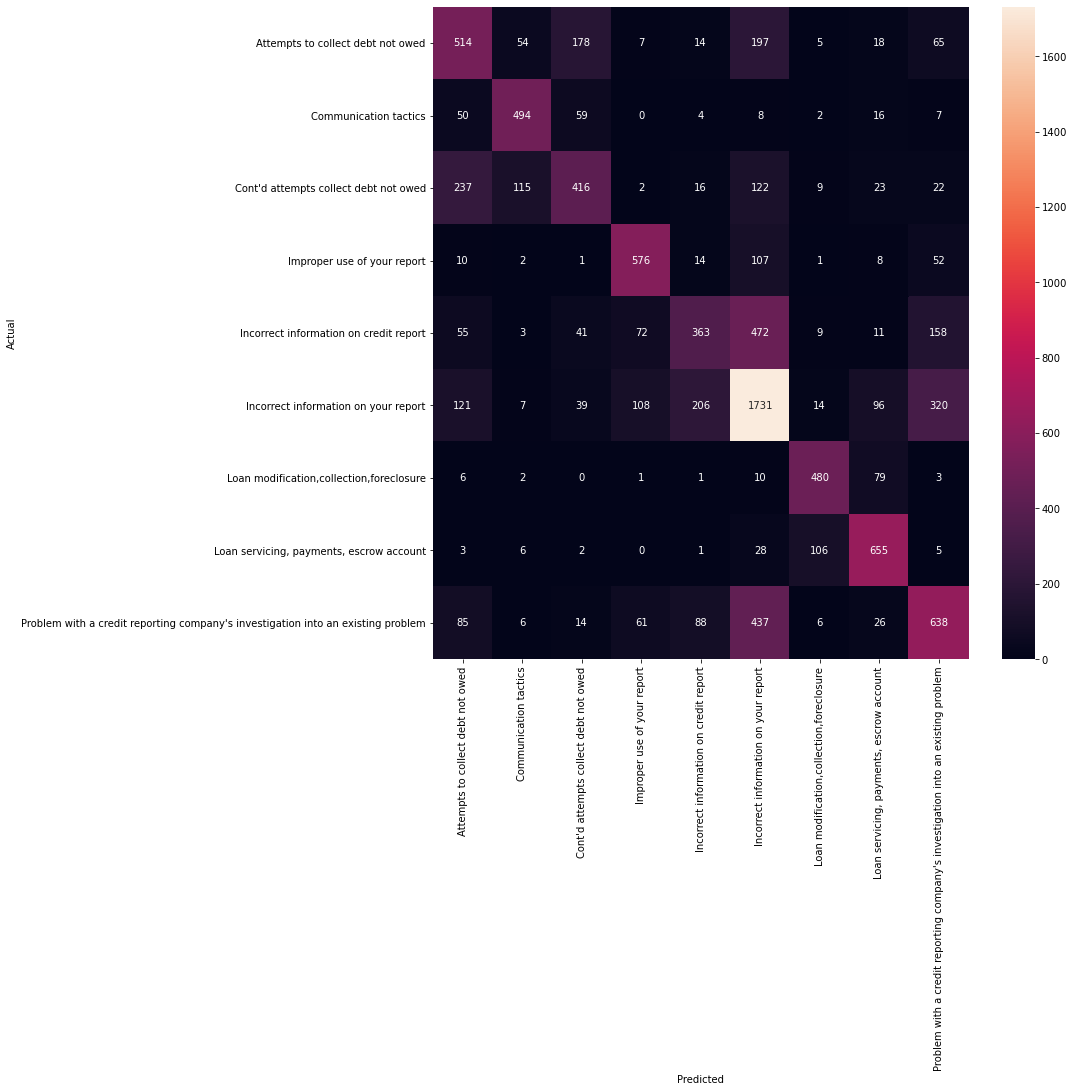

In [202]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
conf_mat = confusion_matrix(Y_test, predictions)
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(conf_mat, annot=True, fmt='d',yticklabels = dictionary.keys(),xticklabels = dictionary.keys())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('Multilclass.png')
plt.show()

In [12]:
# From the heatmap we observe that most of the predictions are in the Incorrect information on report ISSUE. But it is overall
# not such a good result as Incorrect information on report is anyway 25% of the labels

## Second approach - ComplementNB

In [203]:
from sklearn.naive_bayes import ComplementNB
naive_bayes_c = ComplementNB()
naive_bayes_c.fit(X_train,Y_train)

ComplementNB()

In [204]:
predictions = naive_bayes_c.predict(X_test)

In [205]:
predictions_max3 = naive_bayes_c.predict_proba(X_test)

In [206]:
count = 0
for i in range(len(Y_test)):
    if Y_test[i] == predictions[i]:
        count+=1
print(count)
print(count/len(Y_test))

5535
0.5535


In [207]:
max_3_list = []
for i in range(len(predictions_max3)):
    temp = np.argsort(predictions_max3[i])
    #temp1 = np.argsort(temp)
    temp2 = temp[-2:]
    max_3_list.append(temp2)

In [208]:
count = 0
for i in range(len(Y_test)):
    if Y_test[i] in max_3_list[i]:
        #print(Y_test[i],max_3_list[i])
        count+=1
print(count)
print(count/len(Y_test))

7746
0.7746


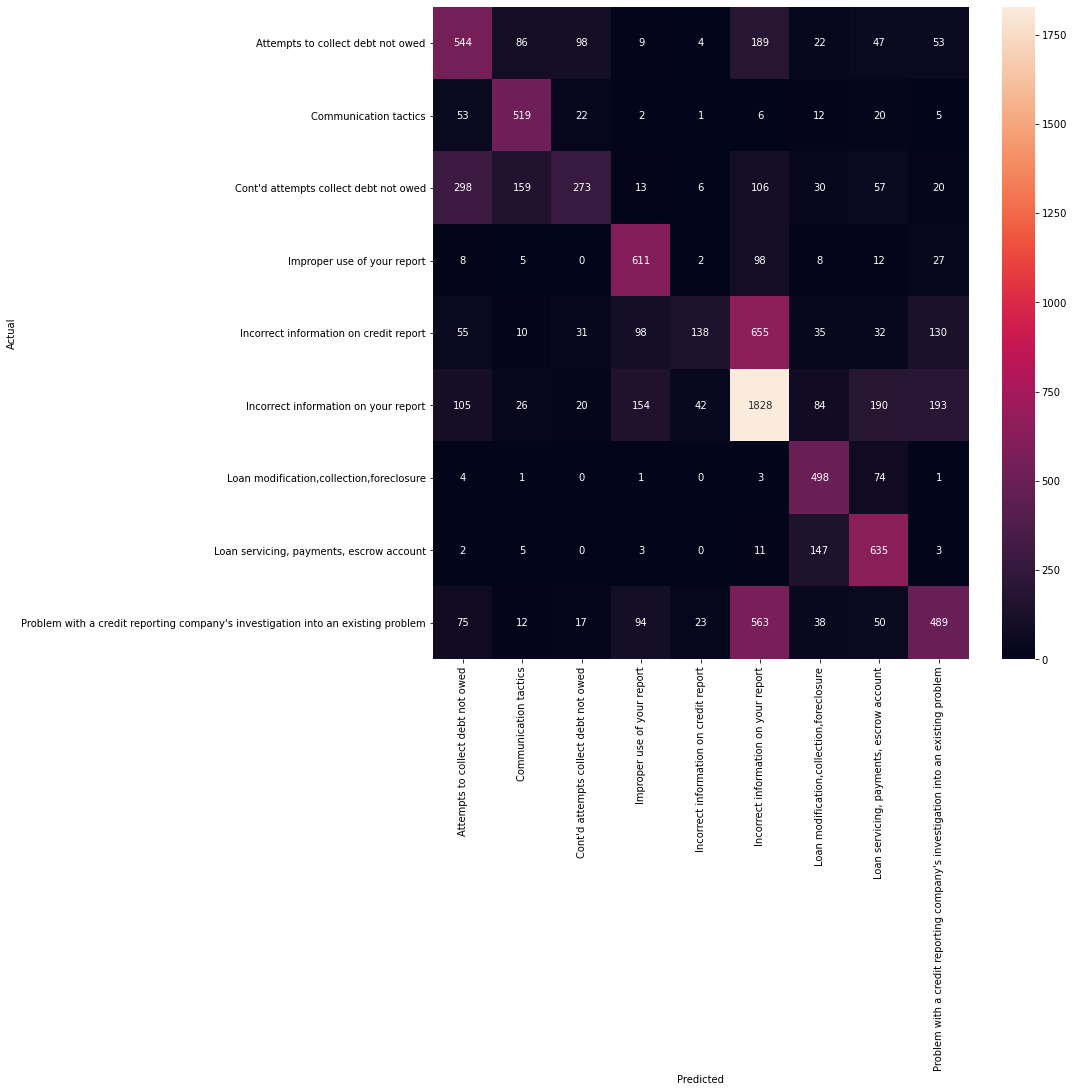

In [209]:
conf_mat = confusion_matrix(Y_test, predictions)
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(conf_mat, annot=True, fmt='d',yticklabels = dictionary.keys(),xticklabels = dictionary.keys())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('complement.png')
plt.show()

## Third approach - LinearSVC

In [210]:
from sklearn.svm import LinearSVC

In [211]:
svc = LinearSVC()
svc.fit(X_train,Y_train)

C:\Users\yashp\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [212]:
predictions = svc.predict(X_test)

In [213]:
count = 0
for i in range(len(Y_test)):
    if Y_test[i] == predictions[i]:
        count+=1
print(count/len(Y_test))

0.5869


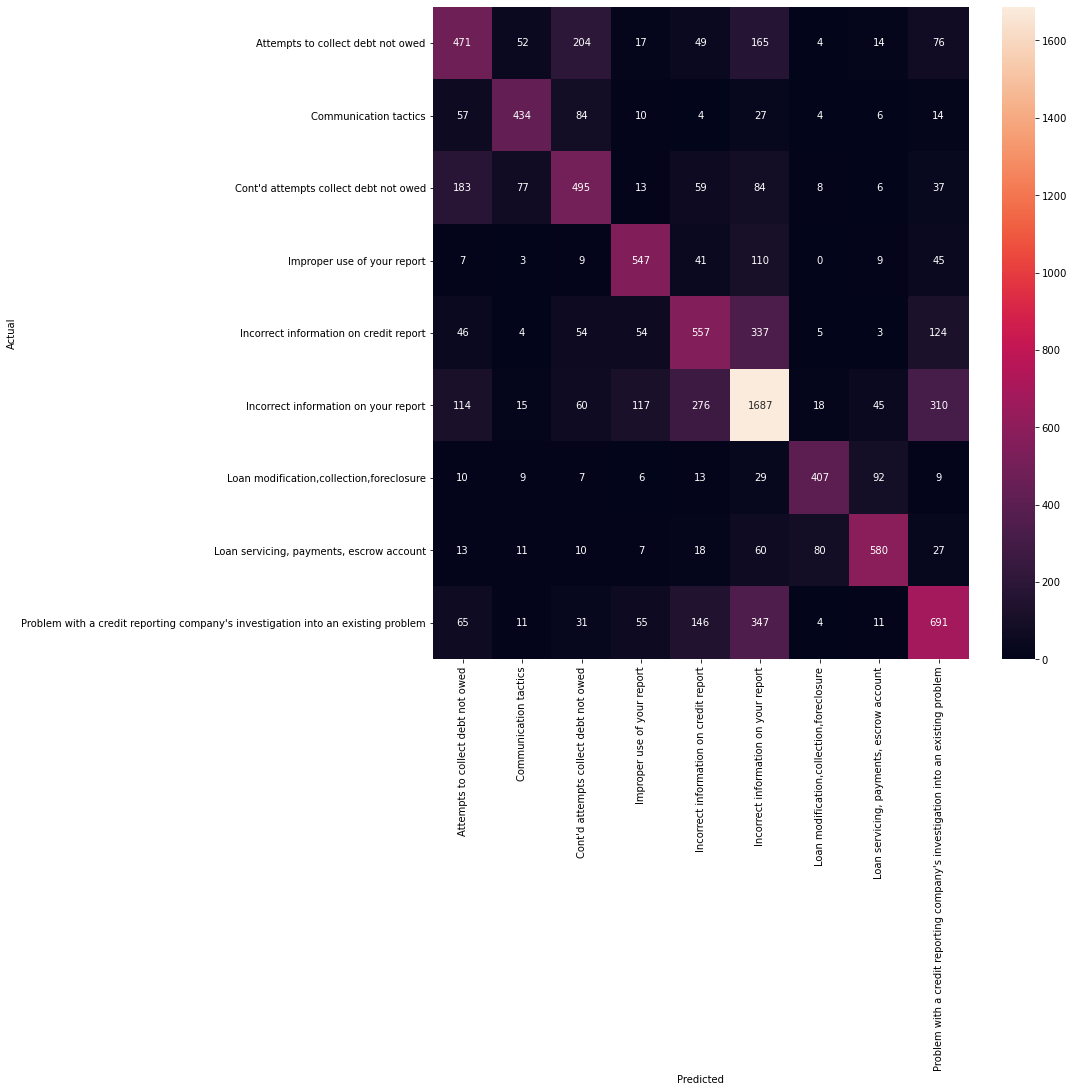

In [214]:
conf_mat = confusion_matrix(Y_test, predictions)
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(conf_mat, annot=True, fmt='d',yticklabels = dictionary.keys(),xticklabels = dictionary.keys())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('svm.png')
plt.show()